### Importing the Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

from keras.models import load_model

### Loading the Model

In [2]:
model = load_model('Data\modelHandWritten.h5')

Creating a dictionary of letters with Index

In [3]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Reading the images from the Specified Path

In [6]:
images = [cv.imread(file) for file in glob.glob(r"D:\AIProject\Git\Object_Detecting--mage_Processing\NhanDangChuViet\imgTest\*.png")]

Plotting the Images read from the file

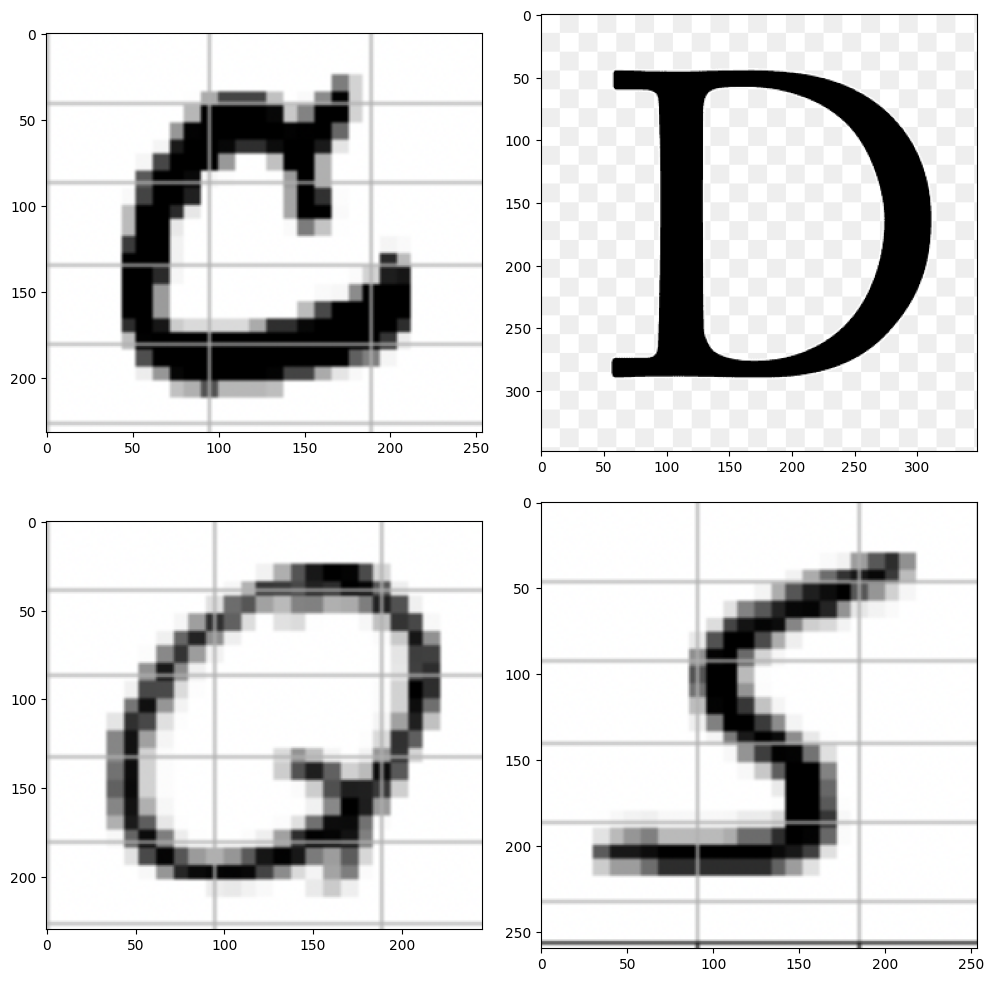

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(4):
    axes[i].imshow(images[i])

plt.tight_layout()
plt.show()

### Image Processing, Plotting and Predicting the images 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


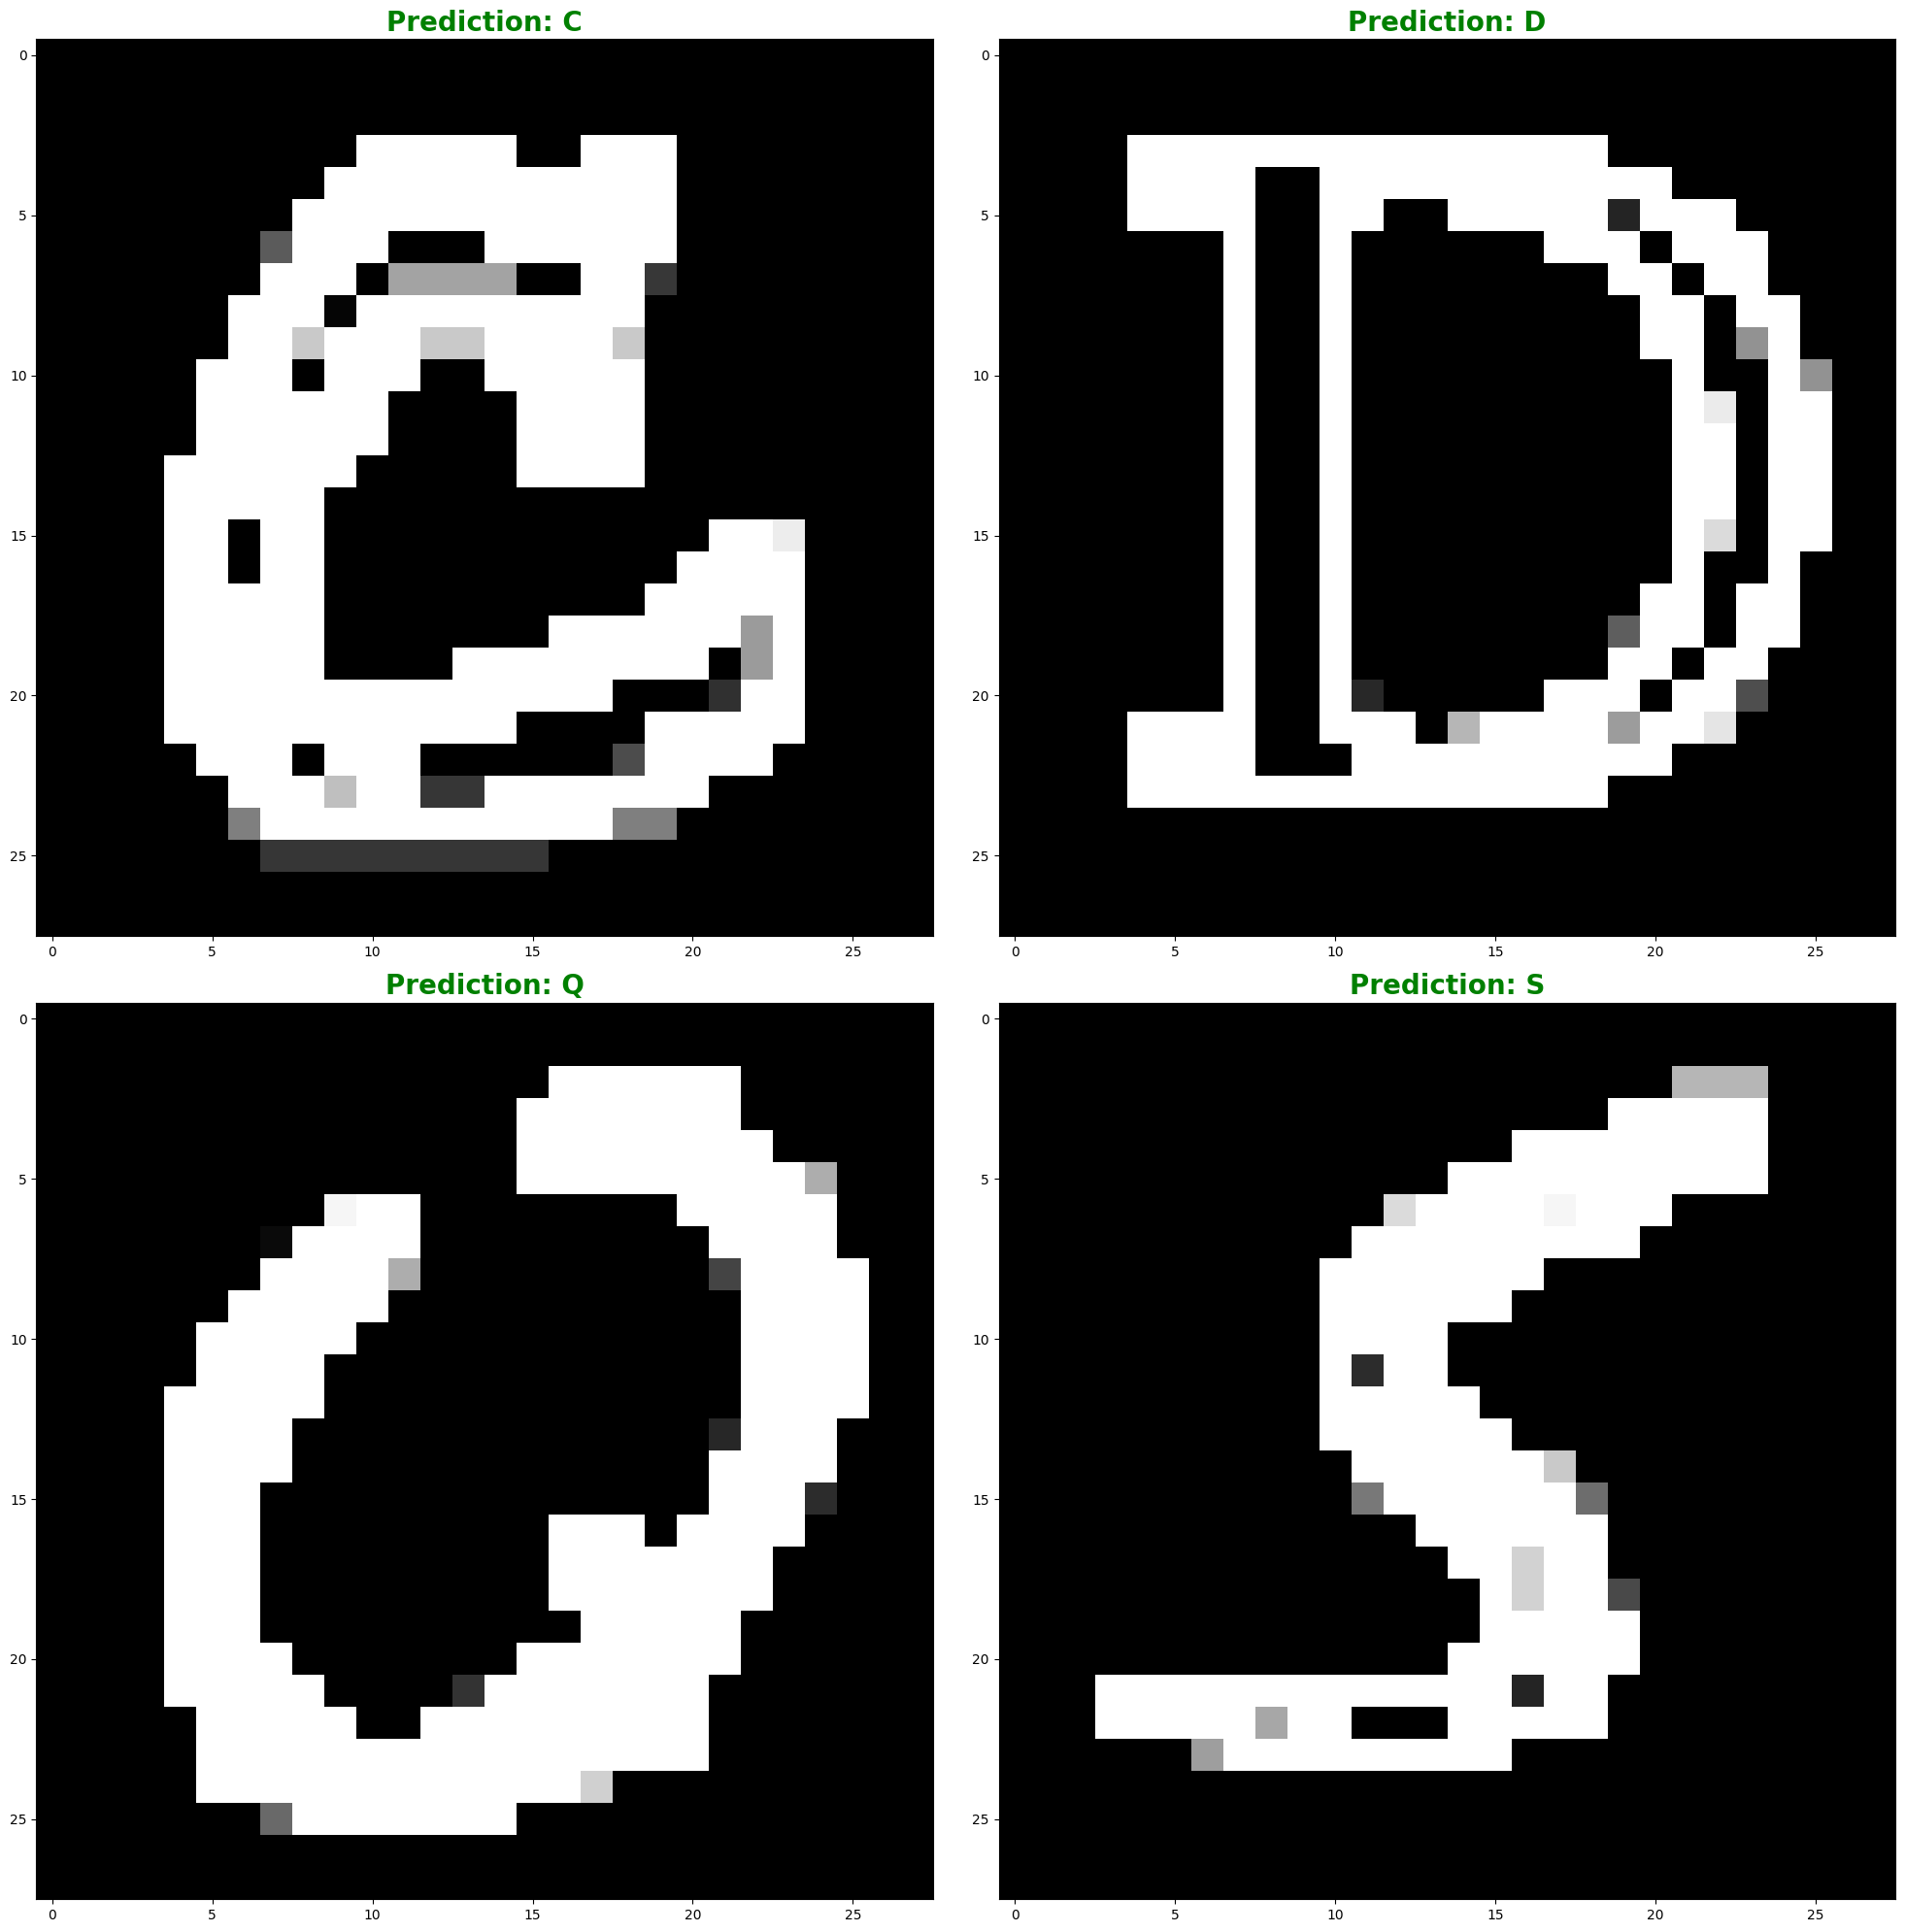

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  
axes = axes.flatten()

for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray, 5)
    
    _, gray = cv.threshold(gray, 75, 180, cv.THRESH_BINARY)
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
    gray = cv.erode(gray, kernel, iterations=1)

    element = cv.getStructuringElement(cv.MORPH_RECT, (17, 17))
    gray = cv.morphologyEx(gray, cv.MORPH_GRADIENT, element)

    gray = gray / 255.0
    gray = cv.resize(gray, (28, 28))
    gray = np.reshape(gray, (28, 28))

    axes[i].imshow(gray, cmap='gray')

    prediction = model.predict(np.reshape(gray, (1, 28, 28, 1)))
    pred_label = dict_word[np.argmax(prediction)]
    axes[i].set_title("Prediction: " + pred_label, fontsize=20, fontweight='bold', color='green')

for i in range(len(images), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
